In [36]:
setwd('/import/DB/fel/BJTC-204')

In [37]:
expr = readRDS('./expr.rds')

In [11]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [13]:
expr1 = expr %>%  dplyr::filter(Group == 'MDD')

In [14]:
expr1 = expr1[,-2]

In [16]:
rownames(expr1) = expr1[,1]
expr1 = expr1[,-1]

In [22]:
model.gene = c('RPE65' ,'DRD3', 'MC3R','RELB',  'PRF1')

In [24]:
expr1 = expr1[,model.gene]

In [25]:
expr2 = expr1 %>% t() %>%  as.data.frame() %>%  tibble::rownames_to_column(.,'sample')

In [28]:
write.table(expr2,file  = 'bulk.expr.train.txt',sep = '\t',quote =F,row.names = F)

In [31]:
groupinfo = read.csv('./bulk2.group.csv')

In [33]:
write.table(groupinfo,file  = 'bulk.expr.group.train.txt',sep = '\t',quote =F,row.names = F)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.3     v purrr   1.0.1
v tibble  3.2.1     v stringr 1.5.0
v tidyr   1.3.0     v forcats 1.0.0
v readr   2.1.4     
Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'ggpubr' was built under R v

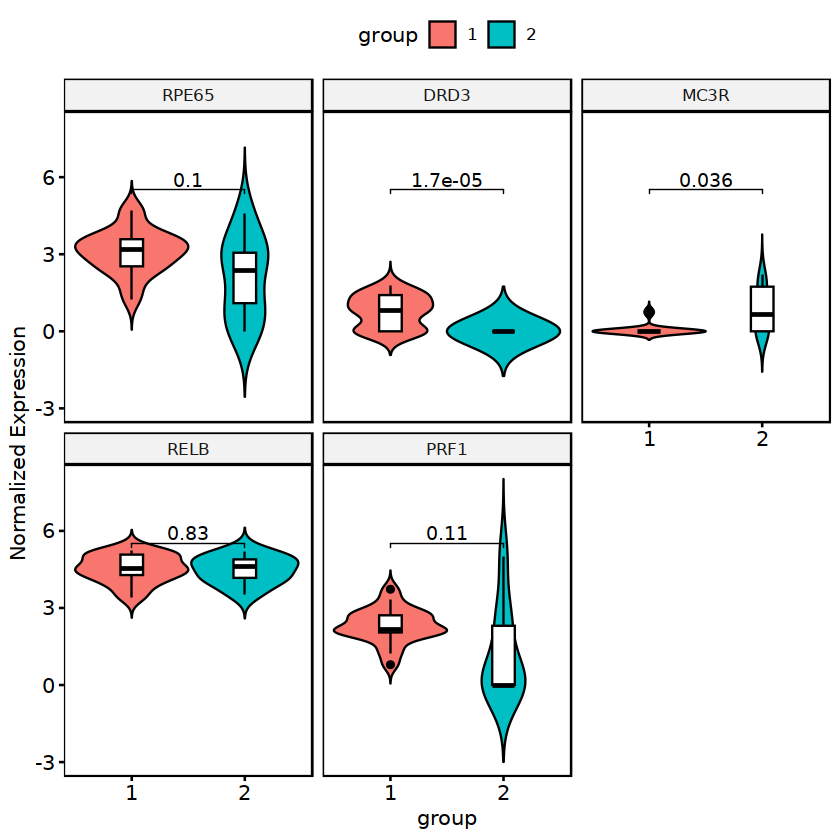

In [34]:
violinplot = function(
    expr = expr,
    gene = gene,
    groupinfo = groupinfo
){

library(dplyr)
library(tidyverse)
library(ggpubr)
count = read.table(expr,header =T,sep = '\t')
groupinfo = read.table(groupinfo,row.names = 1,sep = '\t',header =T)
colnames(count)[1] = 'Gene'
count = count[!duplicated(count$Gene),]

rownames(count) = count[,1]
count = count[,-1]
count  = count[gene,]
count.t = as.data.frame(t(count))
    head(count.t,2)
count.t$group = groupinfo$group
    if (length(unique(count.t$group)) ==3){
    my_comparisons <- list( c(unique(count.t$group)[1], unique(count.t$group)[2]),
                           c(unique(count.t$group)[1], unique(count.t$group)[3]),
                          c(unique(count.t$group)[2], unique(count.t$group)[3]))##分组设定
    e<-count.t %>% 
      dplyr::filter(group %in% unique(count.t$group) ) %>% #筛选行
      ggviolin(x = "group", y = c(colnames(count.t)[1:dim(count.t)[2]-1]), fill = "group",
               combine = T,
             #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##颜色设置
             ylab="Normalized Expression",
             add = "boxplot", add.params = list(fill = "white"))
    p =  e+stat_compare_means(method = "t.test",
                         #label = "p.signif",##星号设置
                         comparisons = my_comparisons)

    print(p)
    }else if(length(unique(count.t$group)) == 2){
    my_comparisons <- list( 
                          c(unique(count.t$group)[1], unique(count.t$group)[2]))##分组设定
    e<-count.t %>% 
      dplyr::filter(group %in% unique(count.t$group) ) %>% #筛选行
      ggviolin(x = "group", y = c(colnames(count.t)[1:dim(count.t)[2]-1]), fill = "group",
               combine = T,
             #palette = c("#00AFBB", "#E7B800", "#FC4E07"),##颜色设置
             ylab="Normalized Expression",
             add = "boxplot", add.params = list(fill = "white"))
    p =  e+stat_compare_means(method = "t.test",
                         #label = "p.signif",##星号设置
                         comparisons = my_comparisons)
    }

if (length(gene) > 6){
    ggsave(file = 'violin.pdf',width = 9,height = 9)
}else{
    ggsave(file = 'violin.pdf')
}
p
#return(count.t)
}

count = './bulk.expr.train.txt'
gene = c('RPE65' ,'DRD3', 'MC3R','RELB',  'PRF1')
group = './bulk.expr.group.train.txt'
violinplot(count,gene,group)